In [1]:
print("TOWFEKA BENTA TOWHID")
print("ID: 11200120427")

TOWFEKA BENTA TOWHID
ID: 11200120427


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


In [3]:
df= pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df['Sex'].replace(['M','F'],[0,1],inplace=True)
df['ChestPainType'].replace(['TA','ATA','NAP','ASY'],[0,1,2,3],inplace=True)
df['RestingECG'].replace(['Normal','ST','LVH'],[0,1,2],inplace=True)
df['ExerciseAngina'].replace(['N','Y'],[0,1],inplace=True)
df['ST_Slope'].replace(['Up','Flat','Down'],[0,1,2],inplace=True)

In [6]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,0,0
1,49,1,2,160,180,0,0,156,0,1.0,1,1
2,37,0,1,130,283,0,1,98,0,0.0,0,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,2,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,0,132,0,1.2,1,1
914,68,0,3,144,193,1,0,141,0,3.4,1,1
915,57,0,3,130,131,0,0,115,1,1.2,1,1
916,57,1,1,130,236,0,2,174,0,0.0,1,1


In [7]:
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y =  df[['HeartDisease']]



In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((642, 11), (276, 11), (642, 1), (276, 1))

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
gaussNB = GaussianNB()

In [12]:

gaussNB.fit(X_train,y_train)

GaussianNB()

In [13]:
y_pred = gaussNB.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Compute predictions
y_pred = gaussNB.predict(X_test)

# Compute the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Use predict_proba to get probabilities for the positive class
roc_auc = roc_auc_score(y_test, gaussNB.predict_proba(X_test)[:, 1])

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')


Accuracy: 0.8514492753623188
Precision: 0.8461538461538461
Recall: 0.8859060402684564
F1 Score: 0.8655737704918033
ROC AUC: 0.9208370765734821


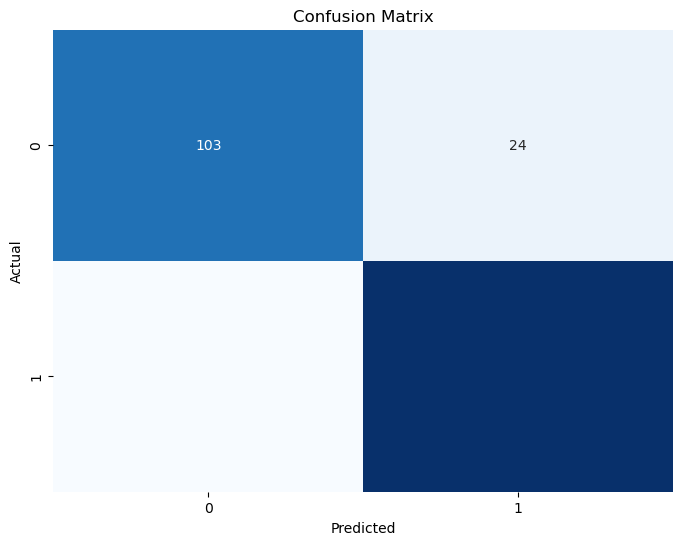

ROC AUC: 0.92


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)  # Assuming y_pred is already defined

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Get predicted probabilities for the positive class
y_pred_proba = gaussNB.predict_proba(X_test)[:, 1]  # Use predict_proba for probabilities

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print ROC AUC score
print(f'ROC AUC: {roc_auc:.2f}')





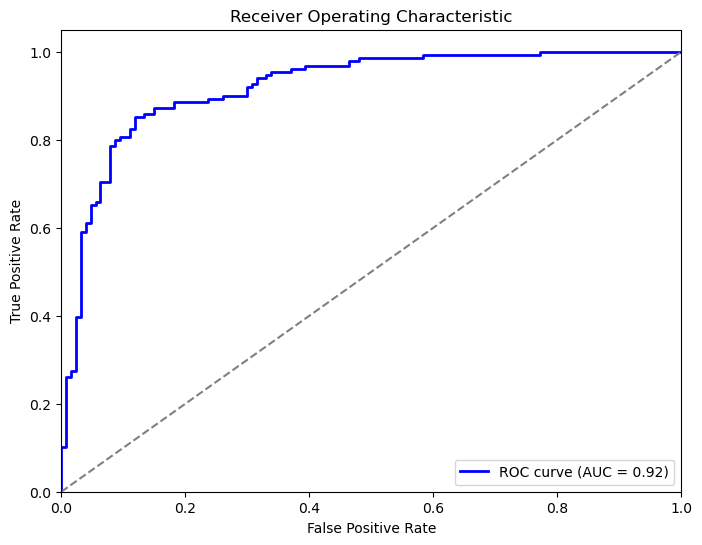

In [16]:

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random guessing)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
